In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


with open("assessment_da25.csv") as csvfile:
        results = pd.read_csv(csvfile)

In [9]:
print(results.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Variant                2000 non-null   object 
 1   Number of page views   2000 non-null   int64  
 2   GMV (in $)             2000 non-null   float64
 3   Number of add to cart  2000 non-null   int64  
 4   Clicks on media        2000 non-null   int64  
 5   Time on Page (sec)     2000 non-null   int64  
 6   user_id                2000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 109.5+ KB
None


In [18]:
results.head(), results.describe(), results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Variant                2000 non-null   object 
 1   Number of page views   2000 non-null   int64  
 2   GMV (in $)             2000 non-null   float64
 3   Number of add to cart  2000 non-null   int64  
 4   Clicks on media        2000 non-null   int64  
 5   Time on Page (sec)     2000 non-null   int64  
 6   user_id                2000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 109.5+ KB


(  Variant  Number of page views  GMV (in $)  Number of add to cart  \
 0       A                     5         0.0                      0   
 1       A                     4         0.0                      4   
 2       A                     4         0.0                      2   
 3       A                     5         0.0                      0   
 4       A                     5         0.0                      3   
 
    Clicks on media  Time on Page (sec)  user_id  
 0                2                  74        0  
 1                1                  21        1  
 2                0                   1        2  
 3                1                  26        3  
 4                3                  46        4  ,
        Number of page views   GMV (in $)  Number of add to cart  \
 count           2000.000000  2000.000000            2000.000000   
 mean               5.151000     8.489760               2.176500   
 std                2.333864    27.861282               1.518

In [91]:
# Calculate the number of users in Variants A and B(sample size)
n_A = results[results['Variant'] == 'A']['user_id'].count()
n_B = results[results['Variant'] == 'B']['user_id'].count()
print('Variant A users:',n_A)
print('Variant B users:',n_B)

Variant A users: 1000
Variant B users: 1000


Variant A users: 1.495
Variant B users: 1.324


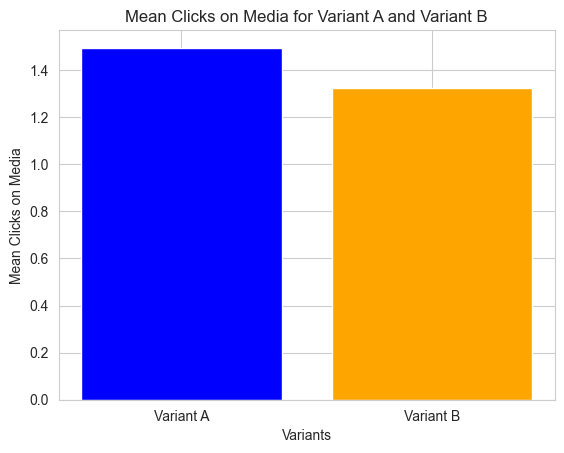

In [92]:
# Parameters of the distribution,for Clicks on media
n_A = results[results['Variant'] == 'A']['Clicks on media'].mean()
n_B = results[results['Variant'] == 'B']['Clicks on media'].mean()
print('Variant A users:',n_A)
print('Variant B users:',n_B)

# Creating bar chart
labels = ['Variant A', 'Variant B']
values = [n_A, n_B]

plt.bar(labels, values, color=['blue', 'orange'])
plt.xlabel('Variants')
plt.ylabel('Mean Clicks on Media')
plt.title('Mean Clicks on Media for Variant A and Variant B')
plt.show()

Variant A users (excluding $0): 96.124875
Variant B users (excluding $0): 95.76835051546392


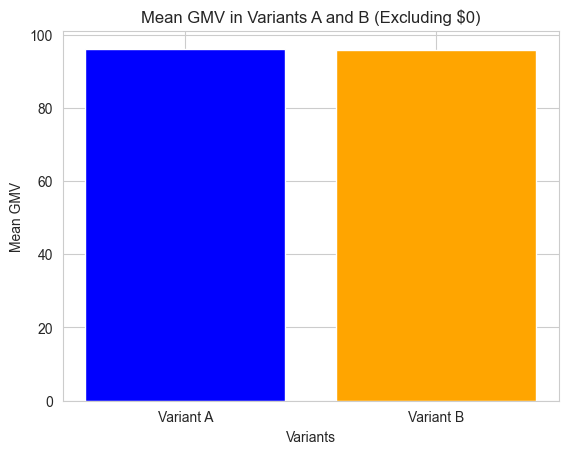

In [94]:
# Parameters of the distribution,for GMV
# Filter out rows where GMV is not equal to 0
filtered_results_A = results[(results['Variant'] == 'A') & (results['GMV (in $)'] != 0)]
filtered_results_B = results[(results['Variant'] == 'B') & (results['GMV (in $)'] != 0)]

# Calculate the mean of GMV for each variant
n_A = filtered_results_A['GMV (in $)'].mean()
n_B = filtered_results_B['GMV (in $)'].mean()

print('Variant A users (excluding $0):', n_A)
print('Variant B users (excluding $0):', n_B)

# Creating bar chart
labels = ['Variant A', 'Variant B']
values = [n_A, n_B]

plt.bar(labels, values, color=['blue', 'orange'])
plt.xlabel('Variants')
plt.ylabel('Mean GMV')
plt.title('Mean GMV in Variants A and B (Excluding $0)')
plt.show()

Variant A Add to Cart: 1.884
Variant B Add to Cart: 2.469


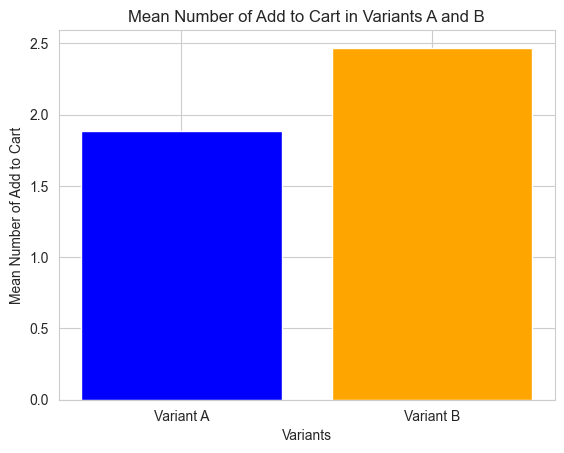

In [95]:
# Parameters of the distribution,for Number of add to cart
n_A_add_to_cart = results[results['Variant'] == 'A']['Number of add to cart'].mean()
n_B_add_to_cart = results[results['Variant'] == 'B']['Number of add to cart'].mean()
print('Variant A Add to Cart:', n_A_add_to_cart)
print('Variant B Add to Cart:', n_B_add_to_cart)

# Creating bar chart
labels = ['Variant A', 'Variant B']
values = [n_A_add_to_cart, n_B_add_to_cart]

plt.bar(labels, values, color=['blue', 'orange'])
plt.xlabel('Variants')
plt.ylabel('Mean Number of Add to Cart')
plt.title('Mean Number of Add to Cart in Variants A and B')
plt.show()

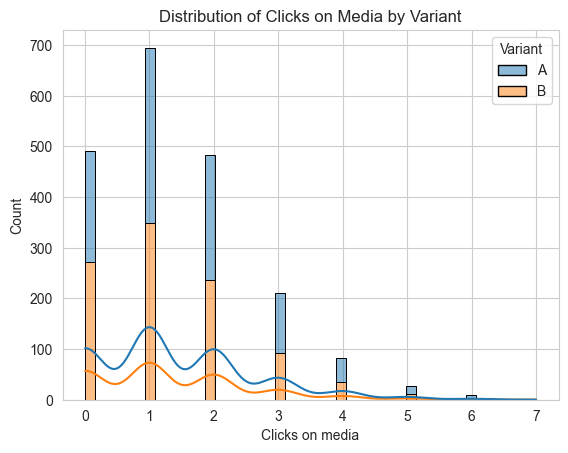

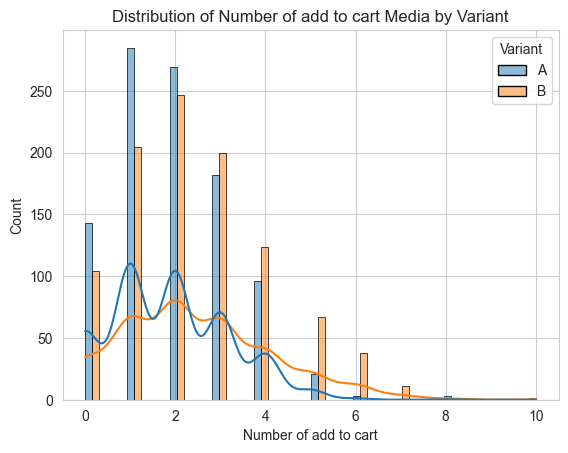

In [102]:
# Visualize the distribution of Clicks on media & number of add to cart by variant

sns.histplot(data=results, x='Clicks on media', hue='Variant', kde=True,multiple='stack',edgecolor='black')
plt.title('Distribution of Clicks on Media by Variant')
plt.show()

sns.histplot(data=results, x='Number of add to cart', hue='Variant', kde=True, multiple='dodge',edgecolor='black')
plt.title('Distribution of Number of add to cart Media by Variant')
plt.show()

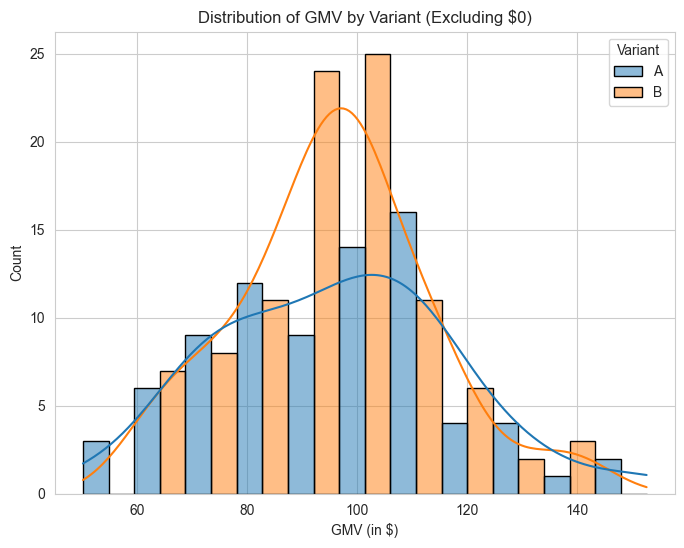

Variant A users (excluding $0): 96.124875
Variant B users (excluding $0): 95.76835051546392


In [99]:
# Visualize the distribution of GMV by variant

# Filter out rows where GMV is not equal to 0 for each variant
filtered_results_A = results[(results['Variant'] == 'A') & (results['GMV (in $)'] != 0)]
filtered_results_B = results[(results['Variant'] == 'B') & (results['GMV (in $)'] != 0)]

# Concatenate the filtered results for both variants
filtered_results = pd.concat([filtered_results_A, filtered_results_B])

# Plot the histogram for GMV by Variant
plt.figure(figsize=(8, 6))
sns.histplot(data=filtered_results, x='GMV (in $)', hue='Variant', kde=True, multiple='dodge',edgecolor='black')
plt.title('Distribution of GMV by Variant (Excluding $0)')
plt.show()

# Calculate the mean of GMV for each variant
n_A = filtered_results_A['GMV (in $)'].mean()
n_B = filtered_results_B['GMV (in $)'].mean()

print('Variant A users (excluding $0):', n_A)
print('Variant B users (excluding $0):', n_B)

In [104]:
from scipy.stats import ttest_ind

# Calculate t-statistic and p-value for Clicks_on_media
Clicks_on_media_a = results[results['Variant'] == 'A']['Clicks on media']
Clicks_on_media_b = results[results['Variant'] == 'B']['Clicks on media']
t_stat_clicks, p_value_clicks = ttest_ind(Clicks_on_media_a, Clicks_on_media_b)

# Calculate t-statistic and p-value for GMV
gmv_variant_a = results[results['Variant'] == 'A']['GMV (in $)']
gmv_variant_b = results[results['Variant'] == 'B']['GMV (in $)']
t_stat_gmv, p_value_gmv = ttest_ind(gmv_variant_a, gmv_variant_b)


# Calculate t-statistic and p-value for Number of add to cart 
Number_of_add_to_cart_a = results[results['Variant'] == 'A']['Number of add to cart']
Number_of_add_to_cart_b = results[results['Variant'] == 'B']['Number of add to cart']
t_stat_number_of_add_to_cart, p_value_number_of_add_to_cart = ttest_ind(Number_of_add_to_cart_a, Number_of_add_to_cart_b)

# Print the results
print(f'Test for Clicks_on_media - t-statistic: {t_stat_clicks}, p-value: {p_value_clicks}')
print(f'Test for GMV - t-statistic: {t_stat_gmv}, p-value: {p_value_gmv}')
print(f'Test for number_of_add_cart- t-statistic: {t_stat_number_of_add_to_cart}, p-value: {p_value_number_of_add_to_cart}')

# Check if either p-value is less than 0.05 and provide interpretation
if p_value_gmv < 0.05 or p_value_clicks < 0.05 or p_value_number_of_add_to_cart < 0.05 :
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference observed.")

Test for Clicks_on_media - t-statistic: 3.1710702328903153, p-value: 0.0015418189281850279
Test for GMV - t-statistic: -1.2839539769831623, p-value: 0.19930692918202245
Test for number_of_add_cart- t-statistic: -8.777389396187946, p-value: 3.517078745065221e-18
Reject the null hypothesis. There is a significant difference.
